# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [1]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = conn.cursor()

In [3]:
# get all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())


[('Categories',), ('sqlite_sequence',), ('Customers',), ('Employees',), ('Shippers',), ('Suppliers',), ('Products',), ('Orders',), ('OrderDetails',)]


In [4]:
# function to run query 

def run_query(query):
    cursor.execute(query)
    rows = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    return pd.DataFrame(rows, columns=columns)

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [5]:
run_query(" select * from Products limit 3")

,ProductID,ProductName,SupplierID,CategoryID,Unit,Price
0,1,Chais,1,1,10 boxes x 20 bags,18
1,2,Chang,1,1,24 - 12 oz bottles,19
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10


In [6]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    select  count(*) from Products where price <10
               
""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [7]:
run_query(" select * from suppliers limit 3")

,SupplierID,SupplierName,ContactName,Address,City,PostalCode,Country,Phone
0,1,Exotic Liquid,Charlotte Cooper,49 Gilbert St.,Londona,EC1 4SD,UK,(171) 555-2222
1,2,New Orleans Cajun Delights,Shelley Burke,P.O. Box 78934,New Orleans,70117,USA,(100) 555-4822
2,3,Grandma Kelly's Homestead,Regina Murphy,707 Oxford Rd.,Ann Arbor,48104,USA,(313) 555-5735


In [8]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    select Country,count(Country) as Counts
    from Suppliers
    group by Country
    order by Counts DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


In [9]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country','Counts'])

# TODO: Generate a visualization on this dataframe
df

,Country,Counts
0,USA,4
1,Germany,3
2,France,3
3,UK,2
4,Sweden,2
5,Japan,2
6,Italy,2
7,Canada,2
8,Australia,2
9,Spain,1


### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [10]:
run_query('select * from Customers limit 3')

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,5021,Mexico
2,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,5023,Mexico


In [11]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    select Country,count(Country) as CustomerCounts
    from Customers
    group by Country
    order by CustomerCounts DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


In [12]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country','CustomerCounts'])

# TODO: Generate a visualization on this dataframe
df

,Country,CustomerCounts
0,USA,13
1,Germany,11
2,France,11
3,Brazil,9
4,UK,7
5,Spain,5
6,Mexico,5
7,Venezuela,4
8,Italy,3
9,Canada,3


### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [13]:
run_query(" select * from Products limit 3")

,ProductID,ProductName,SupplierID,CategoryID,Unit,Price
0,1,Chais,1,1,10 boxes x 20 bags,18
1,2,Chang,1,1,24 - 12 oz bottles,19
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10


In [14]:
run_query("select * from Orderdetails limit 3")

,OrderDetailID,OrderID,ProductID,Quantity
0,1,10248,11,12
1,2,10248,42,10
2,3,10248,72,5


In [15]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute ( """ 
     Select p.ProductName,o.Quantity
          from Products as p
          join Orderdetails as o
          on p.ProductID = o.ProductID
          order by o.Quantity ASC
          limit 20

""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

In [16]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns = ['ProductName','Quantity'])

# TODO: Generate a visualization on this dataframe
df

,ProductName,Quantity
0,Gravad lax,1
1,Teatime Chocolate Biscuits,1
2,Gudbrandsdalsost,1
3,Gnocchi di nonna Alice,2
4,Ravioli Angelo,2
5,Manjimup Dried Apples,2
6,Fløtemysost,2
7,Singaporean Hokkien Fried Mee,2
8,Boston Crab Meat,2
9,Alice Mutton,2


### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [17]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute ( """ 
     Select p.ProductName,(o.Quantity * p.Price) as Revenue
          from Products as p
          join Orderdetails as o
          on p.ProductID = o.ProductID
          order by Revenue ASC
          

""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

In [18]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows,columns=['Productname','Revenue'])

# TODO: Generate a visualization on this dataframe
df

,Productname,Revenue
0,Teatime Chocolate Biscuits,9.2
1,Konbu,12.0
2,Geitost,20.0
3,Spegesild,24.0
4,Gravad lax,26.0
...,...,...
513,Côte de Blaye,5270.0
514,Côte de Blaye,10540.0
515,Côte de Blaye,12911.5
516,Côte de Blaye,13175.0


### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [19]:
run_query("select * from Customers limit 3")

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,5021,Mexico
2,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,5023,Mexico


In [20]:
run_query("select * from Orders limit 3")

,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10248,90,5,1996-07-04,3
1,10249,81,6,1996-07-05,1
2,10250,34,4,1996-07-08,2


In [21]:
run_query("select * from Orderdetails limit 3")

,OrderDetailID,OrderID,ProductID,Quantity
0,1,10248,11,12
1,2,10248,42,10
2,3,10248,72,5


In [22]:
run_query("""select * from Customers as c
               join Orders as o on c.CustomerID = o.CustomerID
               join Orderdetails as od on o.OrderID = od.OrderID
          limit 3
""")

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,OrderDetailID,OrderID,ProductID,Quantity
0,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland,10248,90,5,1996-07-04,3,1,10248,11,12
1,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland,10248,90,5,1996-07-04,3,2,10248,42,10
2,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland,10248,90,5,1996-07-04,3,3,10248,72,5


In [23]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute(""" 
    select c.country, sum(od.quantity) as total 
               from Customers as c
               join Orders as o 
               on c.CustomerID = o.CustomerID
               join Orderdetails as od 
               on o.OrderID = od.OrderID
               group by c.country
               order by total desc


""")
# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

In [24]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows,columns=['Country','Total'])

# TODO: Generate a visualization on this dataframe
df

,Country,Total
0,USA,2139
1,Germany,2015
2,Austria,1565
3,Brazil,1117
4,France,889
5,Canada,772
6,UK,698
7,Ireland,565
8,Venezuela,492
9,Sweden,399


### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [ ]:

# join - customers and orders
# orders-customer_id is null
#Group by Country and count the number of such customer

In [48]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
               """)

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

In [49]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country','CusWithoutOrders'])

# TODO: Generate a visualization on this dataframe
df

,Country,CusWithoutOrders


### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [30]:
run_query("select * from Suppliers limit 3")

,SupplierID,SupplierName,ContactName,Address,City,PostalCode,Country,Phone
0,1,Exotic Liquid,Charlotte Cooper,49 Gilbert St.,Londona,EC1 4SD,UK,(171) 555-2222
1,2,New Orleans Cajun Delights,Shelley Burke,P.O. Box 78934,New Orleans,70117,USA,(100) 555-4822
2,3,Grandma Kelly's Homestead,Regina Murphy,707 Oxford Rd.,Ann Arbor,48104,USA,(313) 555-5735


In [31]:
run_query("select * from  Products limit 3")

,ProductID,ProductName,SupplierID,CategoryID,Unit,Price
0,1,Chais,1,1,10 boxes x 20 bags,18
1,2,Chang,1,1,24 - 12 oz bottles,19
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10


In [32]:
run_query("select * from  Orderdetails limit 3")

,OrderDetailID,OrderID,ProductID,Quantity
0,1,10248,11,12
1,2,10248,42,10
2,3,10248,72,5


In [33]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    select s.SupplierName, count(od.OrderID) as CountOrders from Suppliers s
               join Products p on s.SupplierID = p.SupplierID
               join Orderdetails od on p.ProductID = od.ProductID
               group by s.SupplierName 
               order by CountOrders desc
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()

In [34]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns= ['Name','Total'])

# TODO: Generate a visualization on this dataframe
df

,Name,Total
0,Plutzer Lebensmittelgroßmärkte AG,42
1,"Pavlova, Ltd.",40
2,"Specialty Biscuits, Ltd.",33
3,Norske Meierier,32
4,Formaggi Fortini s.r.l.,31
5,Gai pâturage,26
6,Exotic Liquid,21
7,Pasta Buttini s.r.l.,20
8,New Orleans Cajun Delights,20
9,Ma Maison,19


## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?


In [35]:
# to find countries with most customers
cus_df = run_query("""
                   
          select Country, count(*) as CustomerCount 
          from customers 
          group by Country 
          order by CustomerCount Desc
          
          """)
cus_df

,Country,CustomerCount
0,USA,13
1,Germany,11
2,France,11
3,Brazil,9
4,UK,7
5,Spain,5
6,Mexico,5
7,Venezuela,4
8,Italy,3
9,Canada,3


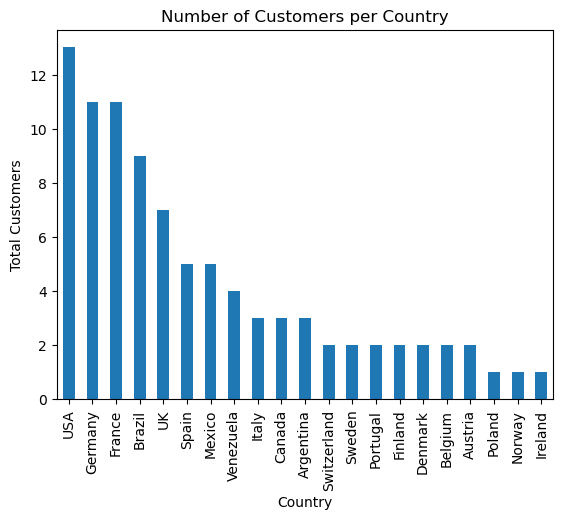

In [36]:
cus_df.plot(kind="bar", x="Country", y="CustomerCount", legend=False)
plt.ylabel("Total Customers")
plt.title("Number of Customers per Country")
plt.show()

In [37]:
# To find countries with most suppliers
Supp_df = run_query("""
          
    select Country,count(*) as SuppCount
    from Suppliers
    group by Country
    order by SuppCount DESC

          """)
Supp_df

,Country,SuppCount
0,USA,4
1,Germany,3
2,France,3
3,UK,2
4,Sweden,2
5,Japan,2
6,Italy,2
7,Canada,2
8,Australia,2
9,Spain,1


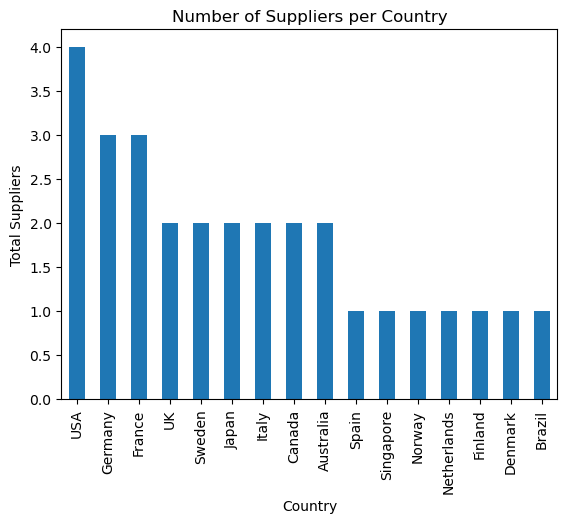

In [38]:
# ploting graph
Supp_df.plot(kind="bar", x="Country", y="SuppCount", legend=False)
plt.ylabel("Total Suppliers")
plt.title("Number of Suppliers per Country")
plt.show()

In [39]:
# merging dataset

merged_df = pd.merge( cus_df, Supp_df, on='Country')
merged_df


,Country,CustomerCount,SuppCount
0,USA,13,4
1,Germany,11,3
2,France,11,3
3,Brazil,9,1
4,UK,7,2
5,Spain,5,1
6,Italy,3,2
7,Canada,3,2
8,Sweden,2,2
9,Finland,2,1


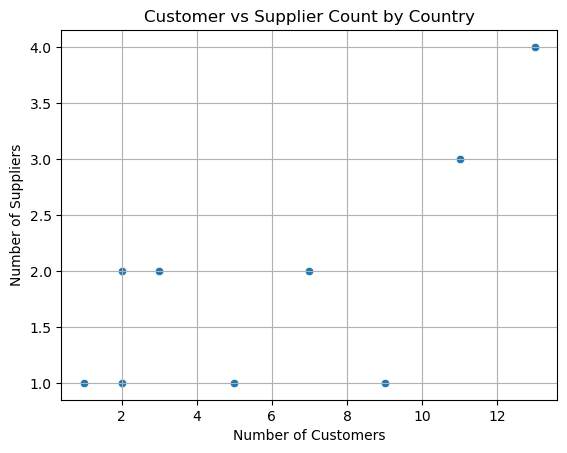

In [40]:
# to find correlation

sns.scatterplot(data = merged_df ,x='CustomerCount',y = 'SuppCount')
plt.title("Customer vs Supplier Count by Country")
plt.xlabel("Number of Customers")
plt.ylabel("Number of Suppliers")
plt.grid(True)
plt.show()

In [41]:
# to find correlation coefficient

merged_df[['CustomerCount',	'SuppCount']].corr()

,CustomerCount,SuppCount
CustomerCount,1.00000,0.74323
SuppCount,0.74323,1.00000


Answer:

The data shows that the USA, Germany, and France have the highest number of customers, and these countries also rank among the top in supplier count. A comparison of customer and supplier counts suggests a moderate positive correlation, countries with more customers tend to have more suppliers. However, the relationship isn’t perfectly proportional, as some customer have relatively few suppliers.ie, one country with 9 customers has only 1 supplier, while another with just 2 or 3 customers has 2 suppliers, showing that supplier count doesn’t consistently scale with customer volume, and highlighting the imbalance in some regions.

________________________________

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

In [42]:
# function to find least popular product by order quantity:

quantity_df = run_query( """ 
     Select p.ProductName,o.Quantity
          from Products as p
          join Orderdetails as o
          on p.ProductID = o.ProductID
          group by p.ProductName
          order by o.Quantity ASC
          
""")
quantity_df

,ProductName,Quantity
0,Gravad lax,1
1,Teatime Chocolate Biscuits,1
2,Gnocchi di nonna Alice,2
3,Scottish Longbreads,3
4,NuNuCa Nuß-Nougat-Creme,4
...,...,...
72,Gumbär Gummibärchen,50
73,Nord-Ost Matjeshering,60
74,Chef Anton's Gumbo Mix,65
75,Chocolade,70


In [43]:
# least popular product by total revenue.

revenue_df = run_query(""" 
     Select p.ProductName,(o.Quantity * p.Price) as Revenue
          from Products as p
          join Orderdetails as o
          on p.ProductID = o.ProductID
          group by p.ProductName
          order by Revenue ASC
          """)
revenue_df

,ProductName,Revenue
0,Teatime Chocolate Biscuits,9.2
1,Gravad lax,26.0
2,Scottish Longbreads,37.5
3,NuNuCa Nuß-Nougat-Creme,56.0
4,Konbu,60.0
...,...,...
72,Mishi Kobe Niku,1940.0
73,Manjimup Dried Apples,2120.0
74,Northwoods Cranberry Sauce,2800.0
75,Sir Rodney's Marmalade,3240.0


In [44]:
Quan_Rev_df = pd.merge(quantity_df, revenue_df, on = 'ProductName')
Quan_Rev_df 

,ProductName,Quantity,Revenue
0,Gravad lax,1,26.00
1,Teatime Chocolate Biscuits,1,9.20
2,Gnocchi di nonna Alice,2,76.00
3,Scottish Longbreads,3,37.50
4,NuNuCa Nuß-Nougat-Creme,4,56.00
...,...,...,...
72,Gumbär Gummibärchen,50,1561.50
73,Nord-Ost Matjeshering,60,1553.40
74,Chef Anton's Gumbo Mix,65,1387.75
75,Chocolade,70,892.50


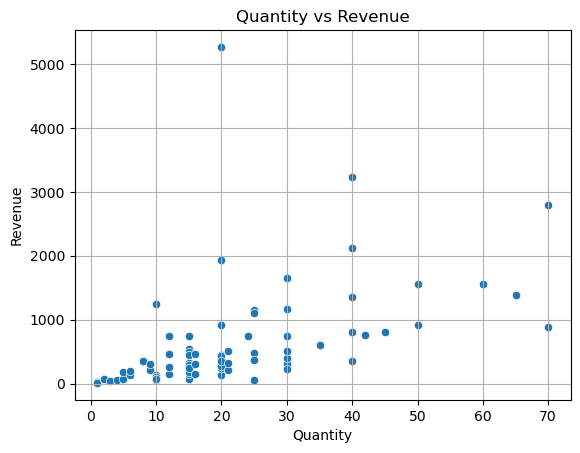

In [45]:
# to find correlation, scatterplotting

sns.scatterplot(data = Quan_Rev_df ,x='Quantity',y = 'Revenue')
plt.title("Quantity vs Revenue")
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

Answer: 

From the graph, we see that products with low quantities also tend to have very low revenue.

This suggests a positive correlation between order quantity and revenue, products ordered more frequently generally produce higher revenue. There are a few exceptions like medium quantity but very high revenue( eg : quantity -20: revenue-6000).

______________________________

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

In [46]:
# function to query Countries with most orders:

run_query(""" 
    select c.country, sum(od.quantity) as total 
               from Customers as c
               join Orders as o 
               on c.CustomerID = o.CustomerID
               join Orderdetails as od 
               on o.OrderID = od.OrderID
               group by c.country
               order by total desc
""")

,Country,total
0,USA,2139
1,Germany,2015
2,Austria,1565
3,Brazil,1117
4,France,889
5,Canada,772
6,UK,698
7,Ireland,565
8,Venezuela,492
9,Sweden,399


In [ ]:
# function to query Countries with Customers who do not order:


### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]

In [51]:
# function to query supplier with most orders:

Supp_Count_df = run_query( """ 
               select s.SupplierName, count(od.OrderID) as CountOrders from Suppliers s
               join Products p on s.SupplierID = p.SupplierID
               join Orderdetails od on p.ProductID = od.ProductID
               group by s.SupplierName 
               order by CountOrders desc
               limit 10
          """)
Supp_Count_df

,SupplierName,CountOrders
0,Plutzer Lebensmittelgroßmärkte AG,42
1,"Pavlova, Ltd.",40
2,"Specialty Biscuits, Ltd.",33
3,Norske Meierier,32
4,Formaggi Fortini s.r.l.,31
5,Gai pâturage,26
6,Exotic Liquid,21
7,Pasta Buttini s.r.l.,20
8,New Orleans Cajun Delights,20
9,Ma Maison,19


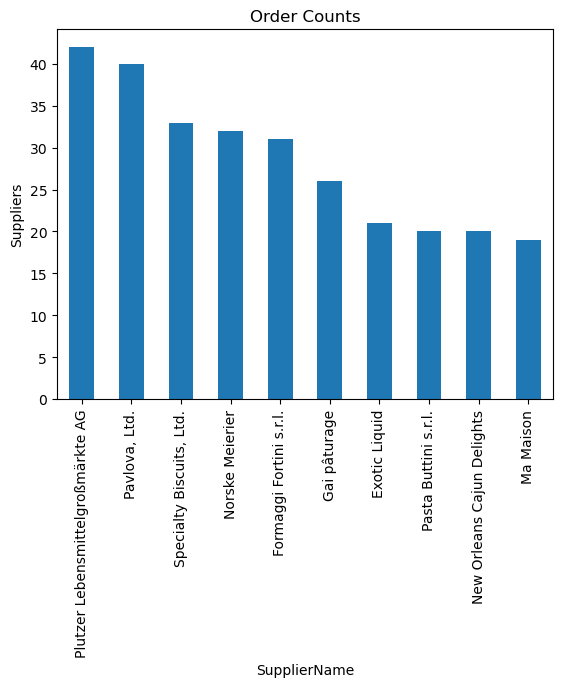

In [52]:
# visualisation

Supp_Count_df.plot(kind="bar", x="SupplierName", y="CountOrders", legend=False)
plt.ylabel("Suppliers")
plt.title("Order Counts")
plt.show()

Answer : 

Plutzer Lebensmittelgroßmärkte AG leads as the most popular supplier with 42 orders, followed closely by Pavlova, Ltd. and Specialty Biscuits, Ltd.